In [46]:
%load_ext autoreload
%autoreload

import io
import os
import sys
import django
import glob
import json
import re
import requests
import pandas as pd
from IPython.core.debugger import set_trace
from pathlib import Path
from django.core.files.base import ContentFile
from rest_framework import serializers
from tqdm.notebook import tqdm
from PIL import Image, ImageSequence

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)
django.setup()

import getch.models as m

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
_pix = m.Pix.objects.all()[4]

In [79]:
_pix.__dict__

{'_state': <django.db.models.base.ModelState at 0x1283abb80>,
 'id': 451,
 'owner_id': 419,
 'src': 'post/2021/3/11/magrittelim@gmail.com/2021-03-11_152830.829702__blob',
 'desc': 'seoul street snap #아디다스 #플랫폼 #코트화 #데님 #셔츠 #그레이 #화이트',
 'tokens': 'outdoor_bench sleeve street_fashion window standing knee grass leisure bench thigh wood human_leg winter sitting eyewear denim brown_hair spring pattern white-collar_worker 야외벤치 소매 스트리트패션 창문 서있는 무릎 잔디 여가 벤치 대퇴골 목재 인간의다리 겨울 좌석 안경 청 갈색머리 봄 무늬 사무직노동자 seoul street snap 아디다스 플랫폼 코트화 데님 셔츠 그레이 화이트',
 'tokens_ko': '야외벤치 티셔츠 스트리트 벤치 우드 바지 안경 데님 패턴있는 오피스룩 아디다스 플랫폼 단화 데님 셔츠 그레이 화이트',
 'outlink': 'https://www.twitter.com/',
 'created_at': datetime.datetime(2021, 3, 12, 12, 53, 19, 720005),
 'type': 'F'}

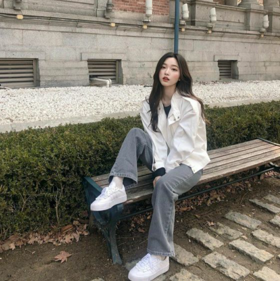

In [80]:
img = Image.open(_pix.src)
img.resize((int(img.width / 2), int(img.height / 2)))

In [81]:
endpoint = 'https://api.omnious.com/tagger/v2.12/tags'
headers = { 
    'x-api-key': 'z75BOQL2oFIepdufKGm8kqYtNnybCVHUZag3XPi6',
    'accept-language': 'ko'
}
json = {
    "image": {
        "type": "url",
        "content": _pix.src.url
#         "content": "https://tagger-image.s3.ap-northeast-2.amazonaws.com/e398336e-5746-42a6-8f61-620853d8b899/20181639-81b8-4b52-b88c-3d52a2f9f352.JPEG"
    },
    "context": {
        "id": _pix.id,
        "detection": [
            "TOP",
            "BOTTOM",
            "WHOLEBODY",
            "SWIMWEAR",
            "SHOES",
            "BAG",
            "HAT",
            "JEWELRY",
            "ACCESSORY"
        ],
#         "gender": "남",
#         "brand": "NIKE",
#         "currency": "KRW",
#         "price": 30000,
#         "age": "20대초",
#         "keywords": "블링블링, 테스트",
#         "productContentName": "원피스",
#         "season": "19SS"
    }
}

In [82]:
json

{'image': {'type': 'url',
  'content': 'https://storage.googleapis.com/sideb-proejct.appspot.com/post/2021/3/11/magrittelim%40gmail.com/2021-03-11_152830.829702__blob?Expires=1633743177&GoogleAccessId=sideb-serviceaccount%40sideb-proejct.iam.gserviceaccount.com&Signature=jeaCjNUx3YsINM2gwBiEVTaIURkc0sRiBFRbNUHR64CqBE8y9400sguw2UPpU05AXKmU70wcrLNzpZu0iCT50EG1uSKAQGpn2u89%2BsbcFzB03UOfgdxMXfmBqPbkB1ZDHq1kdvZWdGQY4ZIZnquW58BY1p%2Fvi%2FePYn6d9ucsh40izeBTKQbmdBZVmIBm5Q8esKyCk1v21xVHU%2FUu7OiJ3oV0i4QvuocmKBUZ9kQKUBj9hWJjqRjJJhBhNl9VrDL3hlgMCjZvptWbcEbporkZGTvTFdvBFHsUKVY3XpeGv3VM%2BLhOxkYsAzUyMXwC0lZP0ZMYkiTrQ5SycSHnUj6DBA%3D%3D'},
 'context': {'id': 451,
  'detection': ['TOP',
   'BOTTOM',
   'WHOLEBODY',
   'SWIMWEAR',
   'SHOES',
   'BAG',
   'HAT',
   'JEWELRY',
   'ACCESSORY']}}

In [83]:
res = requests.post(endpoint, json=json, headers=headers)

In [85]:
res

<Response [201]>

In [86]:
output = res.json(); output

{'data': {'imageInfo': [],
  'genderInfo': {'id': 'T0574', 'name': '여성'},
  'objects': [{'type': 'CLOTHING',
    'tags': [{'category': {'id': 'T0360', 'name': '재킷'},
      'position': {'x': 0.6229199, 'y': 0.47109374},
      'item': {'id': 'T0029', 'name': '트럭커', 'confidence': 0.46497038},
      'colors': [{'id': 'T0325', 'name': '화이트', 'confidence': 0.987812},
       {'id': 'T0326', 'name': '베이지', 'confidence': 0.0109275095},
       {'id': 'T0324', 'name': '블랙', 'confidence': 0.0006150508}],
      'length': {'id': 'T0474', 'name': '노멀', 'confidence': 0.78391546},
      'sleeveLength': {'id': 'T0082', 'name': '긴팔', 'confidence': 0.9214822},
      'neckLine': {'id': 'T0297', 'name': '셔츠카라', 'confidence': 0.6117166},
      'fit': {'id': 'T0479', 'name': '오버사이즈', 'confidence': 0.5512968},
      'shape': None,
      'colorDetail': [{'code': '#dfddd7',
        'name': 'vaporous-gray',
        'pixelFraction': 0.6994014},
       {'code': '#92949b', 'name': 'sleet', 'pixelFraction': 0.1616305

In [87]:
output['data']['objects'][0]

{'type': 'CLOTHING',
 'tags': [{'category': {'id': 'T0360', 'name': '재킷'},
   'position': {'x': 0.6229199, 'y': 0.47109374},
   'item': {'id': 'T0029', 'name': '트럭커', 'confidence': 0.46497038},
   'colors': [{'id': 'T0325', 'name': '화이트', 'confidence': 0.987812},
    {'id': 'T0326', 'name': '베이지', 'confidence': 0.0109275095},
    {'id': 'T0324', 'name': '블랙', 'confidence': 0.0006150508}],
   'length': {'id': 'T0474', 'name': '노멀', 'confidence': 0.78391546},
   'sleeveLength': {'id': 'T0082', 'name': '긴팔', 'confidence': 0.9214822},
   'neckLine': {'id': 'T0297', 'name': '셔츠카라', 'confidence': 0.6117166},
   'fit': {'id': 'T0479', 'name': '오버사이즈', 'confidence': 0.5512968},
   'shape': None,
   'colorDetail': [{'code': '#dfddd7',
     'name': 'vaporous-gray',
     'pixelFraction': 0.6994014},
    {'code': '#92949b', 'name': 'sleet', 'pixelFraction': 0.16163056},
    {'code': '#58646d',
     'name': 'stormy-weather',
     'pixelFraction': 0.059150513},
    {'code': '#363838', 'name': 'pirat

In [88]:
output['data']['objects'][1]

{'type': 'SHOES',
 'tags': [{'category': {'id': 'T0497', 'name': '운동화'},
   'position': {'x': 0.38809988, 'y': 0.70468754},
   'pairIndex': 0,
   'item': {'id': 'T0519', 'name': '스니커즈', 'confidence': 0.87212175},
   'colors': [{'id': 'T0325', 'name': '화이트', 'confidence': 0.90856016},
    {'id': 'T0326', 'name': '베이지', 'confidence': 0.011168859},
    {'id': 'T0341', 'name': '라벤더', 'confidence': 0.009012493}],
   'heelHeight': {'id': 'T0533', 'name': '플랫', 'confidence': 0.9479887},
   'toeType': {'id': 'T0537', 'name': '라운드토', 'confidence': 0.85119},
   'heelShape': None,
   'soleType': {'id': 'T0542', 'name': '플랫폼', 'confidence': 0.89186484},
   'colorDetail': [{'code': '#edf1fe',
     'name': 'brilliant-white',
     'pixelFraction': 0.79565144},
    {'code': '#232f36', 'name': 'dark-navy', 'pixelFraction': 0.11109224},
    {'code': '#847a75', 'name': 'driftwood', 'pixelFraction': 0.042296585},
    {'code': '#5c5658', 'name': 'eiffel-tower', 'pixelFraction': 0.016646849},
    {'code': '

In [89]:
output['data']['objects'][2]

IndexError: list index out of range